In [55]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,10)})
import os

In [56]:
experiments = []
for dirname, _, filenames in os.walk(r'C:\Users\kesha\OneDrive\Desktop\Wimera\second week\dataset'):
    for filename in filenames:
        if filename.startswith('experiment'):
            df = pd.read_csv(f"{dirname}/{filename}", index_col=None, header=0)
            df['Experiment'] = int(filename[-6:-4])
            experiments.append(df)
            
series = pd.concat(experiments, axis=0, ignore_index=True)
series

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,Experiment
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,1
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,1
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,1
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,1
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,8.260000e-01,323.0,118.0,1.580000e-01,12.0,1.0,57.0,3.0,End,18
25282,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,9.710000e-01,320.0,119.0,1.870000e-01,12.0,1.0,57.0,3.0,End,18
25283,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,9.500000e-01,322.0,119.0,1.820000e-01,12.0,1.0,57.0,3.0,End,18
25284,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,9.590000e-01,322.0,118.0,1.820000e-01,12.0,1.0,57.0,3.0,End,18


In [57]:
display(series['Machining_Process'].unique())

array(['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'end',
       'End'], dtype=object)

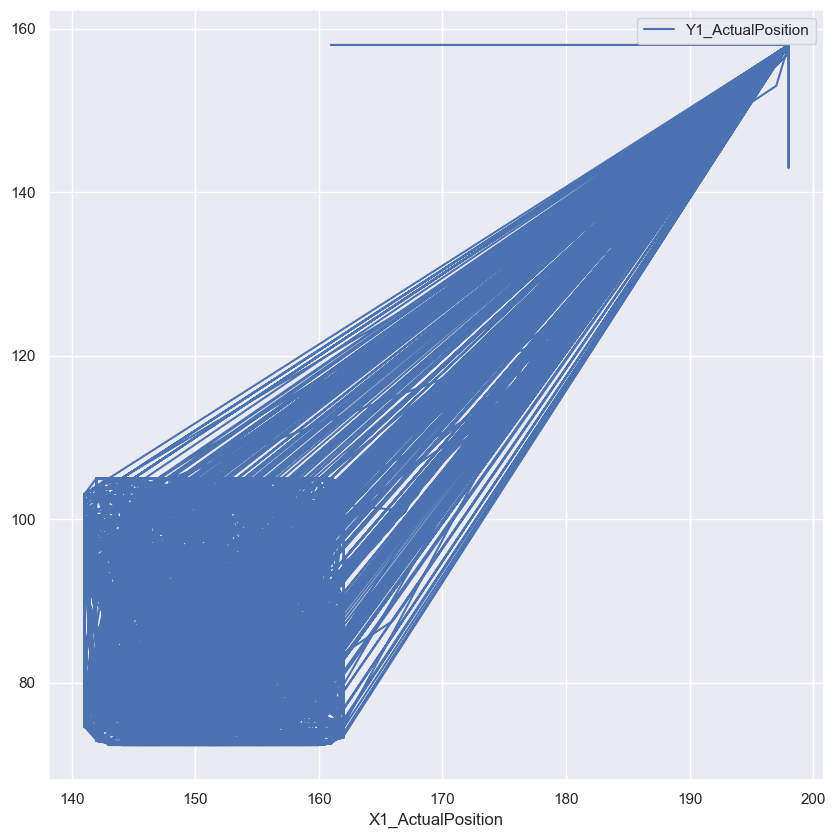

In [58]:
series['Milling'] = series['Machining_Process'].str.startswith('Layer')
series[series.Milling].plot(x='X1_ActualPosition',y='Y1_ActualPosition');

In [38]:
series = series[series.Experiment == 1]

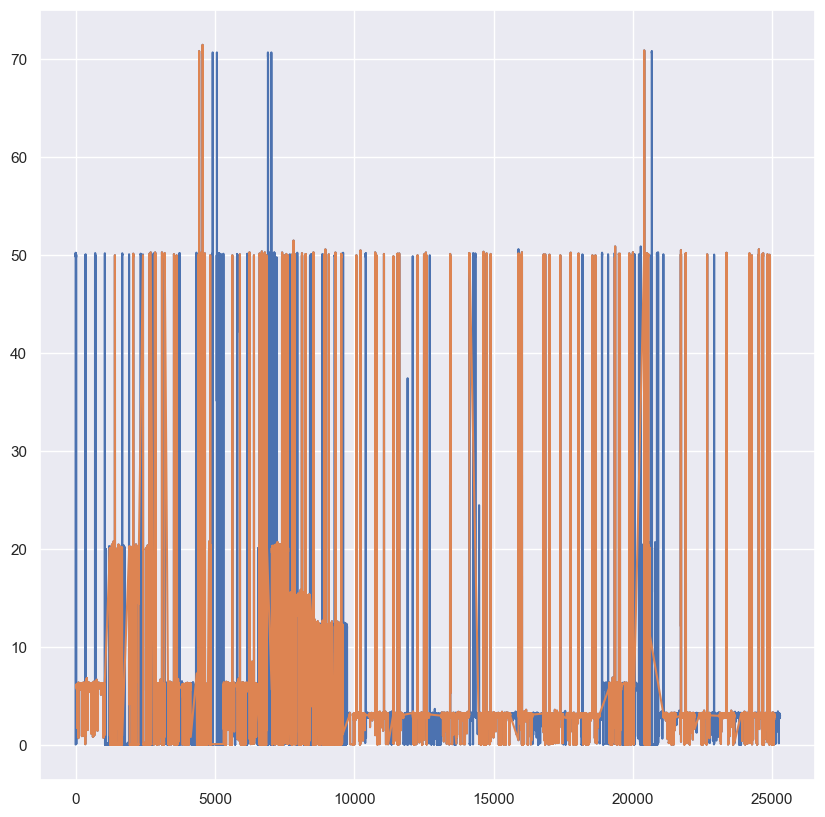

In [59]:
series['Velocity'] = np.sqrt(series['X1_ActualVelocity'] ** 2 + series['Y1_ActualVelocity'] ** 2+ series['Z1_ActualVelocity'] ** 2)
series['Velocity'].plot() 
series[series.Milling]['Velocity'].plot(); 

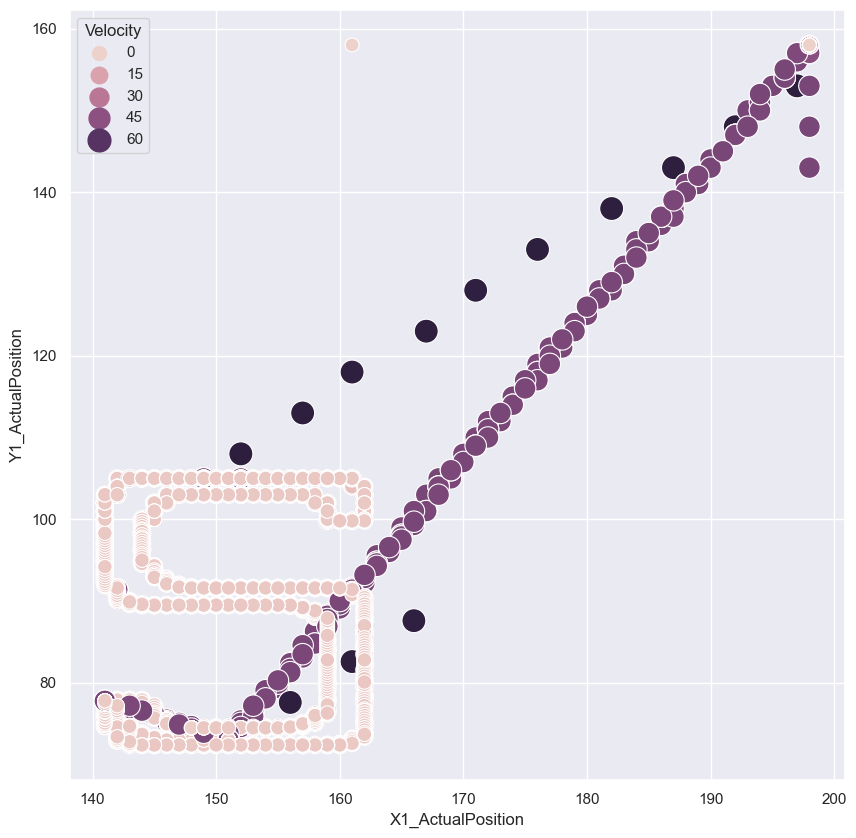

In [60]:
sns.scatterplot(data=series[series.Milling], x='X1_ActualPosition', y='Y1_ActualPosition', hue='Velocity', size='Velocity', sizes=(100, 300));

In [47]:
print(series.head())
print(series.dtypes)

   X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration   
0              198.0                0.0                   0.00  \
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   
3              194.0              -18.0                   0.00   
4              193.0              -17.9                 -18.80   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration   
0               198.0                 0.0                0.000000  \
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage   
0                0.18           0.0207             329.0              2.77  \
1              -10.90           

<Axes: >

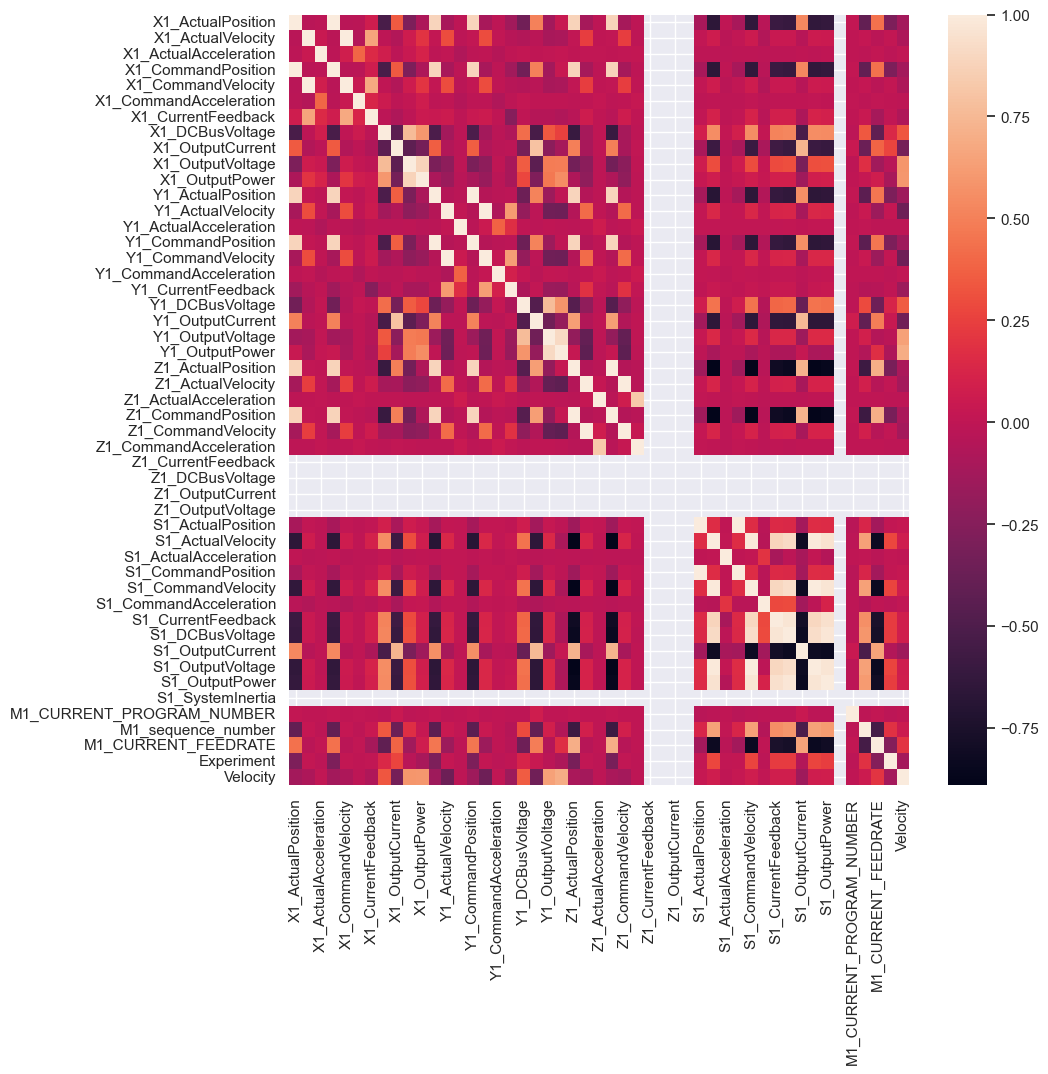

In [61]:
numerical_columns = series.select_dtypes(include=[np.number]).columns
correlation_matrix = series[numerical_columns].corr()
sns.heatmap(correlation_matrix)

In [49]:
milling_pwr = series[series.Milling]['S1_OutputPower'].mean()
not_milling_pwr = series[series.Milling == False]['S1_OutputPower'].mean()
print('Milling pwr average:' + str(milling_pwr))
print('Not Milling pwr average:' + str(not_milling_pwr))
pct = milling_pwr / not_milling_pwr * 100
pct

Milling pwr average:0.17728314833501513
Not Milling pwr average:0.08838427125625001


200.58223687902924

<Axes: xlabel='Machining_Process', ylabel='S1_OutputPower'>

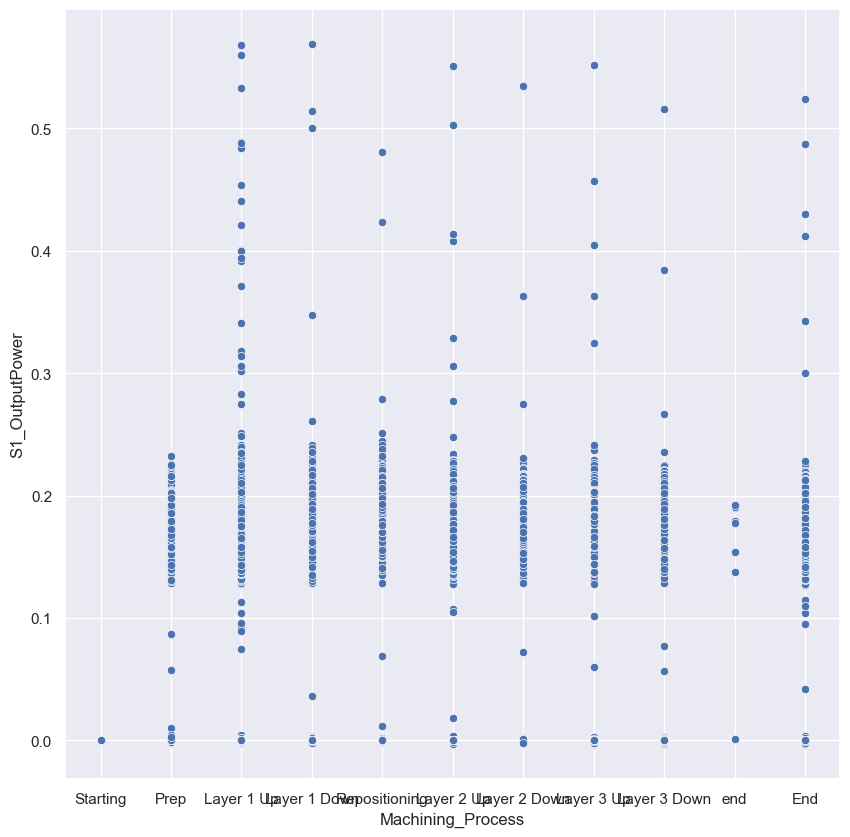

In [62]:
sns.scatterplot(data=series, x='Machining_Process', y='S1_OutputPower')